<a href="https://colab.research.google.com/github/majbrittstenbog/Assignment2/blob/main/Assignment_2_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #16DaysOfActivism.
## An exploratory content analysis of pictures in social media posts on X that use the #16daysofactivism in december 2023.


*By Majbritt Lindholt Stenbøg* \
SIMM71, assignment 2

---
*Notebook environment: Google Colab python version 3.8*\
*Hand-in date: 12th of January, 2024*

16 days of activism is about creating awareness on gender-based violence issues and creating active change to work against it. It is an international occurence and can be seen on multiple social media platforms, shared by individuals, politicians, and organizations (UN Women, 2023). Further, it is also called the orange days, as the color associated with this event is orange. \
\
As this global event unfolds over 16 days, posts, newspaper articles, and statements are shared, often with the purpose of creating change for the better. International organisations such as WHO are encouraging people to share knowledge on social media so people can become aware of the issue and for victims of violence to know where to seek help (WHO, 2023). The social media platform 'X' (formerly known as Twitter) is a widely used platform to share on, and hundreds, maybe thousands of posts has been shared on the platform with the hashtag #16daysofactivism.\
\
It is relevant to look into what is actually posted with the hashtag, expecially at the pictures posted, as studies has shown that pictures are the most effective format to gain peoples attention. A content analysis study by Leung, Bai, and Erdem (2017) showed, that even though looking at hotel ads on Facebook, still, comparing over a 1000 ads and six types of message content, pictures were the most effective format. Further, hashtags can be used by anyone which also means that there might be posts using the hashtags but referring to something else entirely.
Therfore, for this report I will use computer vision to explore 100 pictures posted on X in the time period 25th of Novemeber till the 10th of December (the 16 days the event lasts). The RQ is:\
\
*   *RQ) What are the characteristics of the pictures posted in the 16 days of activism using the hashtag #16daysofactivism on the social media X?*



In [5]:
# Importing packages used for this report.
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import random
import seaborn as sns
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from collections import Counter
import glob

As gdown stopped working I am instead using wget.

In [2]:
!pip install wget
import wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=41c6a92067c077805ad557764062331e23b3db37e9d68836019fa47ca97bca0b
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


Downloading the zip image file and unzipping it.

In [3]:
!wget --no-check-certificate 'https://drive.google.com/uc?id=1gb0G02HVQLVYWSJBjIvwvTFCBB7nEUJf' -O 'orange_days_cv.zip'
!unzip 'orange_days_cv.zip'

--2024-01-12 21:41:56--  https://drive.google.com/uc?id=1gb0G02HVQLVYWSJBjIvwvTFCBB7nEUJf
Resolving drive.google.com (drive.google.com)... 172.217.12.14, 2607:f8b0:4025:815::200e
Connecting to drive.google.com (drive.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1gb0G02HVQLVYWSJBjIvwvTFCBB7nEUJf [following]
--2024-01-12 21:41:56--  https://drive.usercontent.google.com/download?id=1gb0G02HVQLVYWSJBjIvwvTFCBB7nEUJf
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.15.225, 2607:f8b0:4025:802::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.15.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13974097 (13M) [application/octet-stream]
Saving to: ‘orange_days_cv.zip’

orange_days_cv.zip  100%[===================>]  13.33M  61.2MB/s    in 0.2s    

2024-01-12 21:41:58 (61.2 MB/s) - ‘ora

#Computer vision
Computer vision is a method using trained algorithms to detect and transform images' content. It can also be used in multiple other ways, and is used already in e.g., surveillance, face regocnition lock on your phone, and 3D-modelling (Szeliski, 2022b: pp. 3-7). A model can be trained by e.g., deep learning, where you 'feed' the algorithm a large number of image material, with the purpose of training it to detect similar objects in other pictures. In social science, this method is a more automated way of analyzing pictures or videos than manually going through the material by the researcher. Even though it automates the process, it is still relevant to be aware that computer vision models are not flawless, and cannot always perform as well as a human analysis. But computer vision has a lot of features that still makes it useful to use it for analysis, while being aware of its limitations.


---

## Exploring the pictures
First we generate five random pictures to see what the pictures in our folder looks like. When I generated five picture I got group pictures, poster on 'stop violence against women' and pictures that look like they were taken from an event or demonstration. The pictures you get from the random display will likely be other pictures than the ones I got but the pictures gives a nice idea of what images are found in the folder.

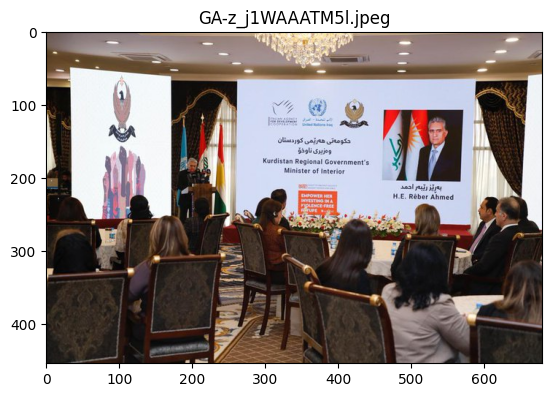

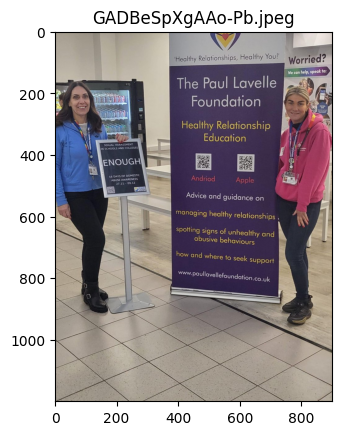

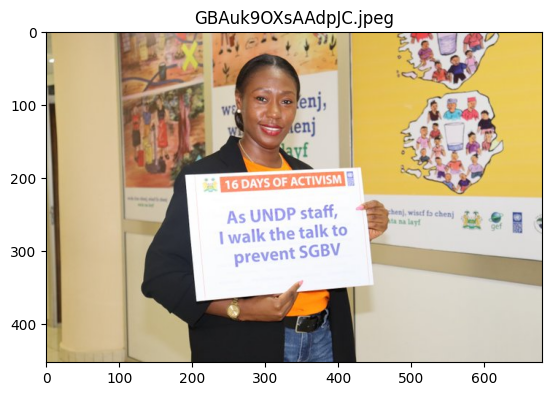

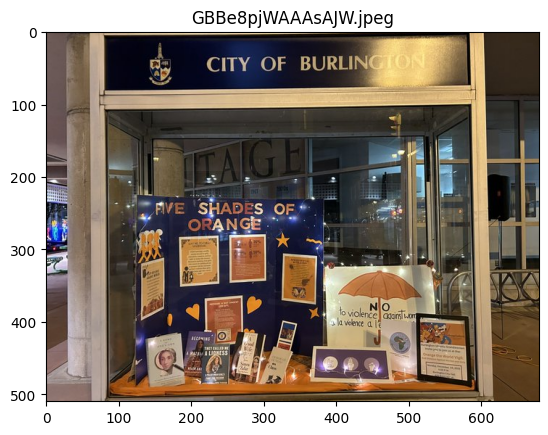

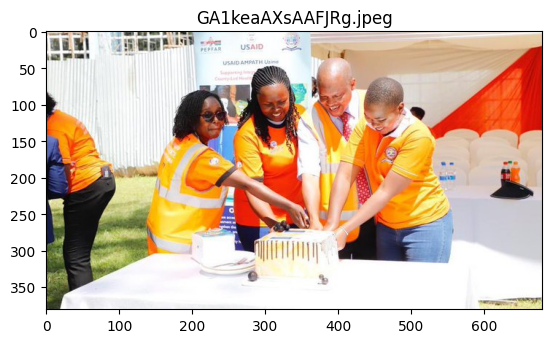

In [4]:
# Got this code from ChatGPT
image_folder = "/content/orange_days_cv"

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Display 5 random images
num_images_to_display = 5
random_images = random.sample(image_files, num_images_to_display)

for img_file in random_images:
    img_path = os.path.join(image_folder, img_file)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.title(img_file)
    plt.show()

## Image values, pixels, and descriptives

By exploring the images I also want to get an overview of the images information. The dimensions of the image shows the image resolution, which is the number of pixels in the image. This shows the size of the image and in that also the image quality. The total number of pixels are found by multiplying the two numbers, i.e., the first image is 675x900 = 607,500 pixels (Singh, 2019: p. 9). Further, it shows number of channels. They have all three channels, as they are all RGB colored images. RGB stands for Red, Green, and Blue, the three colors can mix into any color, and their color intensity ranges from 0 to 255 (Krishna, 2017: p. 45). In this report, color is relevant to explore further, as we would like to see if orange is a typically used color in the posts, and whether other colors might dominate.

In [5]:
# Part of the code is from ChatGPT
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Empty DataFrame to store image statistics
columns = ["Image", "Dimensions", "Channels", "Data Type", "Min Pixel Value", "Max Pixel Value"]
image_stats_df = pd.DataFrame(columns=columns)

# Populate the DataFrame with image statistics
for img_file in image_files:
    img_path = os.path.join(image_folder, img_file)
    img = cv2.imread(img_path)

    dimensions = img.shape
    channels = img.shape[2] if len(dimensions) == 3 else 1
    data_type = img.dtype
    min_pixel_value = img.min()
    max_pixel_value = img.max()

    image_stats_df = image_stats_df.append({
        "Image": img_file,
        "Dimensions": dimensions,
        "Channels": channels,
        "Data Type": data_type,
        "Min Pixel Value": min_pixel_value,
        "Max Pixel Value": max_pixel_value
    }, ignore_index=True)

image_stats_df.head()

<ipython-input-5-926173949983>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_stats_df = image_stats_df.append({
<ipython-input-5-926173949983>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_stats_df = image_stats_df.append({
<ipython-input-5-926173949983>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_stats_df = image_stats_df.append({
<ipython-input-5-926173949983>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_stats_df = image_stats_df.append({
<ipython-input-5-926173949983>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

,Image,Dimensions,Channels,Data Type,Min Pixel Value,Max Pixel Value
0,GAq3HgCW8AAyF0O.jpeg,"(534, 534, 3)",3,uint8,0,255
1,GA-ZVnBXsAAR9FR.jpeg,"(510, 680, 3)",3,uint8,0,255
2,GBBHG8oWEAAUsEC.jpeg,"(453, 680, 3)",3,uint8,0,255
3,GBAyHS3WwAA0Slr.jpeg,"(1200, 925, 3)",3,uint8,0,255
4,GA_ivPqWsAAGajo.jpeg,"(680, 680, 3)",3,uint8,0,255


The pictures's pixels all have an RGB code, which is here transformed into a hex code (another color code). The print test is the color red, as the first number is 255, and the other two 0, which means that it is only the max number of red that would be displayed. In hex code the color red has the code #ff0000. The RGB to HEX transformation is used in the following color analysis.

In [6]:
# rgb to hex
def rgb2hex(rgb):
    hex_code = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex_code
print(rgb2hex([255, 0, 0]))

#ff0000


I tweaked the following code with help from ChatGPT to create a loop in order to read color of the whole folder and not just a single picture.\
\
From sklearn.cluster, we imported KMeans, which is an unsupervised machine learning algorithm that splits the colors of the pictures into clusters. In the code, I specify how many clusters the algorithm is supposed to find, which can be set from a few clusters to a larger number (Szeliski, 2022a: pp. 206-207). In this case, I have decided to have 12 clusters. Because there's so many pictures that all have a different color palette, and since we know from our image dimensions, that the pictures has a large set of pixels, we also include some image resizing in the code, to better process the pictures. The code runs a loop through the images, to find color clusters in the images, and then displays the 12 most occuring colors between all of the images.\
\
Unsupervized learning (in this case clustering with K-Means) is useful in this case, as we are not training the algorithm beforehand, but rather have a set of images we would like to explore and used a pre-trained algorithm. Therefore, this is unsupervised learning, as the data is unlabeled (Szeliski, 2022a: p. 205).

In [7]:
def image_color_cluster(path, k=12):   # load image
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # First, the image is resized to speed up the processing time
    resized_img_rgb = cv2.resize(img_rgb, (64, 64), interpolation=cv2.INTER_AREA)

    # Then the image is reshaped into a list of pixels
    img_list = resized_img_rgb.reshape((resized_img_rgb.shape[0] * resized_img_rgb.shape[1], 3))

    return img_list

def dataset_color_analysis(image_folder, k=12): # image_folder is the path to our pictures and will be used when creating the pie chart.
    # Get a list of all image files in the folder. I have both .jpg, .jpeg and .png images.
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Accumulate pixel colors from all images
    all_colors = []
    for img_file in image_files:
        img_path = os.path.join(image_folder, img_file)
        img_colors = image_color_cluster(img_path, k)
        all_colors.extend(img_colors)

# Clustering of the pixels
    clt = KMeans(n_clusters=k)
    labels = clt.fit_predict(all_colors)

# Labels defined by clustering the pixels is counted
    label_counts = Counter(labels)
    total_count = sum(label_counts.values())

# Subset out most popular centroid (i.e. the average)
    center_colors = list(clt.cluster_centers_)
    ordered_colors = [center_colors[i] / 255 for i in label_counts.keys()]
    color_labels = [rgb2hex(ordered_colors[i] * 255) for i in label_counts.keys()]

# Plot pie chart
    plt.figure(figsize=(14, 8))
    plt.pie(label_counts.values(), labels=color_labels, colors=ordered_colors, startangle=90)
    plt.axis('equal')
    plt.title('Most frequent colors of the social media posts')
    plt.show()

The following pie chart shows a cluster of the 12 most appearing colors in all of the 100 pictures. It is interesting to see that an orange and red color shows up as one of the 12 colors. This gives an indication of that the colors appear often in the pictures, and gives and indication that the color orange, which is associated with 16 days of activism, is actually present in social media pictures. The pictures posted are from both organizations and individuals posting. Further, it is interesting that a purple color also shows up. This might be related to vivid clothing such as bright purple scarfs or if pictures of posters have a purple background. It could also be related to filters, if some pictures has a purple filter.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


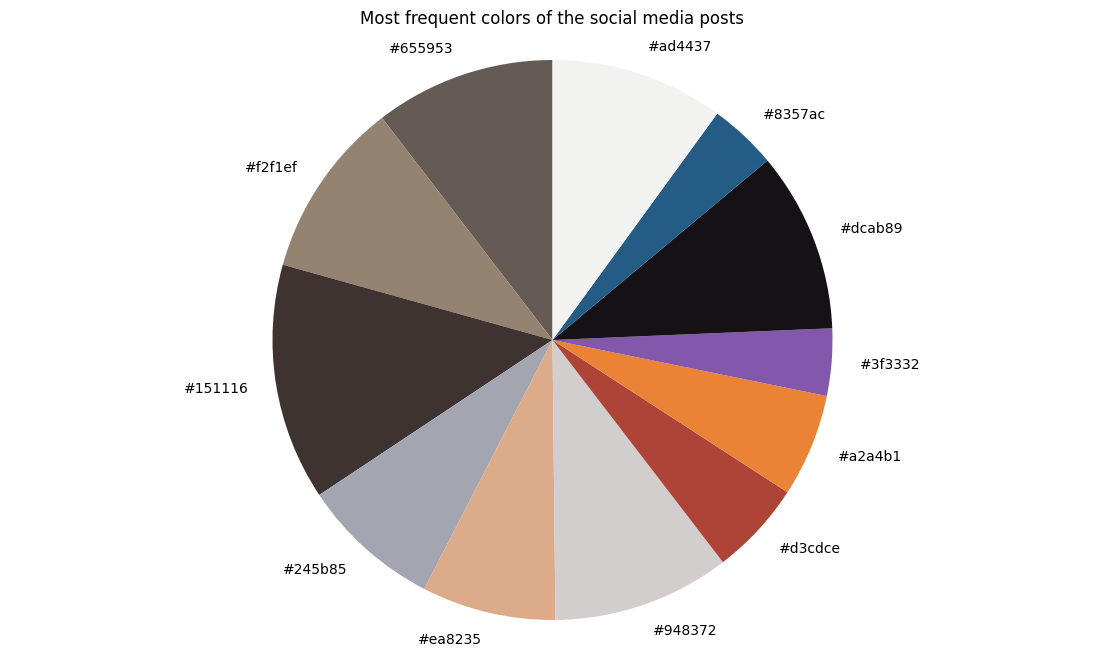

In [8]:
image_folder = "/content/orange_days_cv"

# Perform color analysis on the entire folder, with cluster level of 12.
dataset_color_analysis(image_folder, k=12)

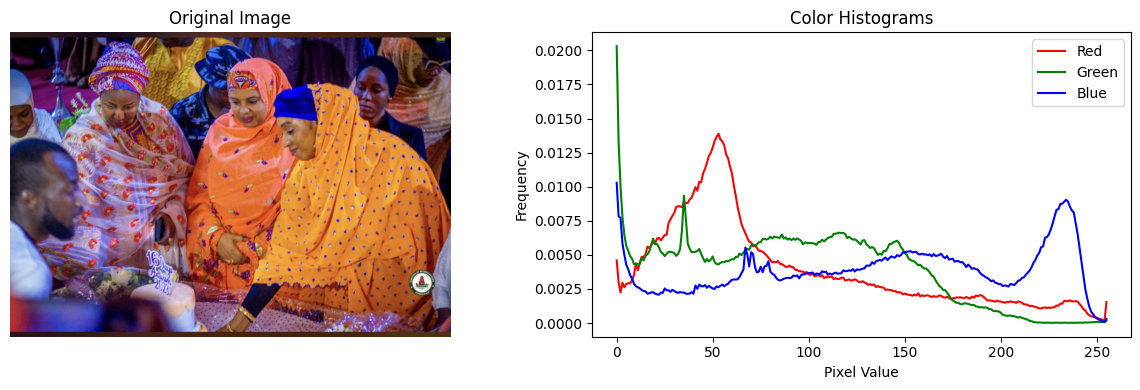

In [9]:
# Read the image
image = cv2.imread('/content/orange_days_cv/GA_NDvWWQAAJ91J.jpeg')

# Calculate color histograms for each channel
hist_r = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
hist_b = cv2.calcHist([image], [2], None, [256], [0, 256])

# Normalize histograms
hist_r /= hist_r.sum()
hist_g /= hist_g.sum()
hist_b /= hist_b.sum()

# Create subplots for the original image and histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the original image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Plot the color histograms using Seaborn
sns.lineplot(x=np.arange(256), y=hist_r.squeeze(), color='red', ax=axes[1], label='Red')
sns.lineplot(x=np.arange(256), y=hist_g.squeeze(), color='green', ax=axes[1], label='Green')
sns.lineplot(x=np.arange(256), y=hist_b.squeeze(), color='blue', ax=axes[1], label='Blue')
axes[1].set_title('Color Histograms')
axes[1].set_xlabel('Pixel Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

As seen above is a color histogram of one of the photos from a post on the 16 days of activism. Some of the colors has a peak in both ends of the histogram, indicating the picture both has darker areas and brigther areas. Further, is also seems like blue is dominating the picture, as it peaks at the higher pixel values.

**Text in images**\
Some of the images also has text, as there are also posters and pictures with statements on. These statements might be important for the pictures meaning and whether it's related to the 16 days of activism. Therefore, I am using the easyocr model to perform an optical character recognition (OCR), which is reading text on images (Szeliski, 2022b: p. 3).

In [10]:
!pip install -q easyocr
import easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 29.6 MB/s eta 0:00:00


In [11]:
# Using the english library to read the image
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [12]:
result = reader.readtext('/content/orange_days_cv/GA-ZVnBXsAAR9FR.jpeg')
result

[([[119, 145], [191, 145], [191, 159], [119, 159]],
  'OBSERVE',
  0.9970620236780828),
 ([[117, 161], [201, 161], [201, 175], [117, 175]],
  '16 DAYS OF',
  0.7126891686253478),
 ([[131, 177], [201, 177], [201, 191], [131, 191]],
  'ACTIVISM',
  0.5318223399077358),
 ([[118, 191], [219, 191], [219, 211], [118, 211]],
  'AGAINST GBV',
  0.5342275575543661),
 ([[360, 194], [394, 194], [394, 218], [360, 218]], 'GB', 0.9978447010343791),
 ([[0, 370], [80, 370], [80, 424], [0, 424]], '3v in', 0.2591164788774858),
 ([[323.3756770666054, 106.06568221304549],
   [447.9991500212324, 133.92859166616114],
   [440.6243229333946, 158.9343177869545],
   [316.0008499787676, 131.07140833383886]],
  'CDISABLEDE',
  0.6622460074260487),
 ([[343.1970684086417, 136.1094462711102],
   [428.97992214090374, 151.6534974254763],
   [423.8029315913583, 177.8905537288898],
   [337.02007785909626, 162.3465025745237]],
  'PEOPLE',
  0.9809948041761027),
 ([[337.1970684086417, 160.1094462711102],
   [432.989419122

In [13]:
reader.readtext('/content/orange_days_cv/GA-ZVnBXsAAR9FR.jpeg', detail=0)

['OBSERVE',
 '16 DAYS OF',
 'ACTIVISM',
 'AGAINST GBV',
 'GB',
 '3v in',
 'CDISABLEDE',
 'PEOPLE',
 'AGAINST',
 'AELP',
 'FIGHT',
 'OUR ',
 'EOUNTRY']

I only ran one image, but ideally I would have the OCR run on all pictures to see the texts and possibly do a wordcloud or word frequency. Because the runtime would be too long, I only kept it to one image. The words in this image that the OCR read seems highly relevant for the *16 days of activism to end gender-based violence* and in this case it seems like it is specifically people with disabilities they are mentioning in their fight against GBV (Gender-Based Violence). It is interesting to see that this picture do correspond to the hashtag, whereas social media is also known for having a lot of 'noise' regarding posting on a hashtag or similar things. Therefore, I would also expect some 'noise' (meaning content that has nothing to do with the hashtag).\
\
It is also evident that some of the words has not been read correctly, such as 'EOUNTRY'. By looking at the original image, the word misspelled is 'country'. The model caught most of the text in the picture, which was this image:

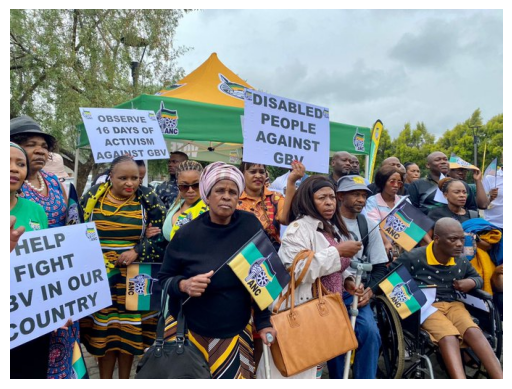

In [14]:
# Load the image
image_path = '/content/orange_days_cv/GA-ZVnBXsAAR9FR.jpeg'
image = Image.open(image_path)

# Display the image I gave the OCR model
plt.imshow(image)
plt.axis('off')
plt.show()


# Object detection, face detection, and human attributes
The next part of the analysis consists of object detection and classification, and also detection of human attributes such as gender, emotion, and ethnicity. The model from DeepFace has an analysis category called 'race', which i call 'ethnicity' in this project.\
\
The first part, 'object detection', is where I use transformers to use the model pipeline 'object-detection' to analyze which objects appears in the different images. Szeliski explains object detection as follows: "*The main task in object detection [...] is to put accurate bounding boxes around all the objects of interest and to correctly label such objects*" (Szeliski, 2022c: p. 302). This will be done using the detr-resnet-50 model.\
\
In the second part I used DeepFace to detect face attributes. The algorithm is trained on multiple facial images, and thus will predict what it believes to be the correct gender, emotion and ethnicity. Deepface can also predict age, but I did not see it relevant to include (Serengil & Ozpinar, 2021). For an optimal face attribute analysis, I first ran a face detection analysis and saved the cropped faces in a new folder. Multiple images are from gatherings, demonstrations and such, and whilst there are a lot of people in the images, the face detection algorithm did not detect most of the faces, and have only saved a smaller portion of faces from the original images.

###1) Object detection:

In [1]:
!pip install timm
import timm

In [2]:
!pip install transformers

Installing my model, which is not specified, so therefore it downloads the facebook detr-resnet-50 for object detection. The Facebook resnet model has been trained on the Microsoft COCO (Common Objects in Context) image dataset, and resnet-50 one of the models within general object detection that has a high average precision (Szeliski, 2022c: pp. 302, 305).

In [3]:
from transformers import pipeline
model = pipeline("object-detection")

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In the following code I run my object detection. At first, I create an emptry rows list, then, using the glob package, I retrieve a list of file paths for each image. I use base64, which encodes the images in UTF-8 string. This is done because I had issues before with running the analysis, but when changing the image files into a UTF-8 string, the code has no errors. The dict1 is a dictionary, that stores information from each image, and then it is all saved in an dataframe and displayed.\
It usually takes me about 7-9 minutes to run this codecell, and is the codecell that takes the longest.

In [7]:
import base64
from tqdm import tqdm
import glob
import pandas as pd

rows_list = []
image_paths = sorted(glob.glob('/content/orange_days_cv/*'))

for img_path in tqdm(image_paths, desc="Processing images"):
    with open(img_path, "rb") as image_file:
        # Encode the image in base64
        encoded_image = base64.b64encode(image_file.read()).decode("utf-8")

    dict1 = {}
    res = model(encoded_image)
    dict1.update({"image": img_path, "result": res})
    rows_list.append(dict1)

df = pd.DataFrame(rows_list)
df.head()


Processing images: 100%|██████████| 100/100 [07:28<00:00,  4.48s/it]


,image,result
0,/content/orange_days_cv/F_uQhbWXcAAOlSS.png,[]
1,/content/orange_days_cv/GA-ZVnBXsAAR9FR.jpeg,"[{'score': 0.9440926909446716, 'label': 'perso..."
2,/content/orange_days_cv/GA-oExKXQAAh784.jpeg,"[{'score': 0.9894819259643555, 'label': 'perso..."
3,/content/orange_days_cv/GA-oGHTWAAAbhZv.jpeg,"[{'score': 0.9577723741531372, 'label': 'perso..."
4,/content/orange_days_cv/GA-q7urXoAAxJua.jpeg,"[{'score': 0.9970654845237732, 'label': 'perso..."


The results from the object detection analysis is stored in a new dataframe, where for each object (label) is found in an image, a row for that object is created. Further, the results is split into their own columns. It also displays the confidence levels from 0 to 100. For example, the first row in the dataframe has predicted a part of the image (the object detected part) to be a person with a 0.94 confidence, which is high.

In [8]:
rows_list = []
for index, row in df.iterrows():
  for i in row.result:
    dict1 = {}
    dict1.update({"image":row.image})
    dict1.update(i)
    rows_list.append(dict1)

df_res = pd.DataFrame(rows_list)
df_res.head()

,image,score,label,box
0,/content/orange_days_cv/GA-ZVnBXsAAR9FR.jpeg,0.944093,person,"{'xmin': 438, 'ymin': 196, 'xmax': 485, 'ymax'..."
1,/content/orange_days_cv/GA-ZVnBXsAAR9FR.jpeg,0.995901,person,"{'xmin': 520, 'ymin': 286, 'xmax': 680, 'ymax'..."
2,/content/orange_days_cv/GA-ZVnBXsAAR9FR.jpeg,0.966597,person,"{'xmin': 544, 'ymin': 209, 'xmax': 569, 'ymax'..."
3,/content/orange_days_cv/GA-ZVnBXsAAR9FR.jpeg,0.978890,person,"{'xmin': 444, 'ymin': 226, 'xmax': 526, 'ymax'..."
4,/content/orange_days_cv/GA-ZVnBXsAAR9FR.jpeg,0.957137,person,"{'xmin': 577, 'ymin': 230, 'xmax': 651, 'ymax'..."


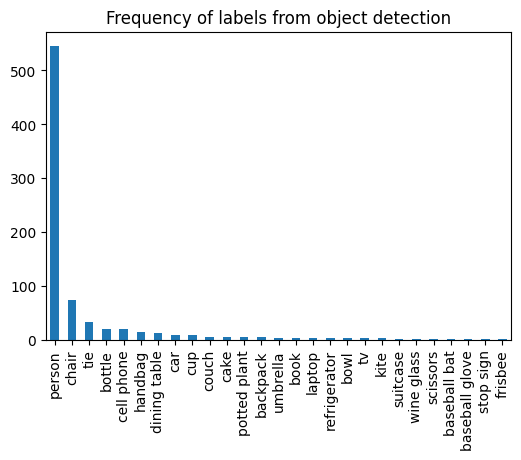

In [9]:
df_res.label.value_counts().plot(kind='bar', figsize=(6, 4))
plt.title("Frequency of labels from object detection")
plt.show()

Lastly, the object labels are displayed in a barplot. What is interesting here is that within the 100 images the object detection found over 500 persons, which gives an idea that most of the images shows groups of people, demonstrations, events or similar situations. It also found about 80 chairs, which is could also be linked to events or similar situations. Further, the object detection also found a lot of everyday items, such as bottle, cell phone, handbag and so on. At the lowest end of the barplot, it also shows kite, frisbee, and baseball glove, which I am unsure is actually presented in any of the images. This also shows that the object detection model is not perfect, and might detect parts of the images incorrectly. Another thing to note as well is, that since the hashtag is related to activities and such on diminishing gender-based violence, it could be expected to find images with a violent or depressive look. Objects related to this does not seem to show up in the object detection, and while most of those images are probably people in a scenario, the object detection only classifies them as "persons" and not a 'bad' or 'good' person, which would also be difficult for a model to detect. This is possibly something that face emotion attributes can help with.

###2) Face detection
As the barplot from the object detection showed, a lot of the images from the X posts on 16 days of activism includes persons. Therefore, I am executing a face detection with the purpose of finding faces that can be analyzed by DeepFace afterwards. This is because it is much harder for face recognition models to analyze the images, if the faces has not been detected first, as this would mean the model would look through every pixel of the image, instead of only the faces (Szeliski, 2022c: p. 295). The following face detection model (Haarcascade) is an algorithm implemented in openCv that combines elements of feature-based and appearance-based methods. Haarcascade is from the 2000's and one of the first face detection algorithms to detect faces in realtime, and uses *boosting* to train a series of classifiers, where the algorithm reads over the image and determine distance from e.g., the eye and the cheek (which would look like a rectangular black and white patch), and if the dimensions fits, then it is approved as part of a face. It then determines if something is a face if enough of these decision stumps are approved (or all of them) (Szeliski, 2022c: pp. 297-298). It is a simple algorithm that typically only needs 10-30 FPS (frames per second).

In [21]:
# Got part of the code from ChatGPT
# Pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Path to my images
folder_path = '/content/orange_days_cv'

# Output folder for saving face-detected images
output_folder_path = '/content/face_detected'
os.makedirs(output_folder_path, exist_ok=True)

# Loop through all files
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):  # Adjust the file extensions as needed
        # Load the image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)

        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Detect faces in the image
        faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

        # Check if faces are detected
        if len(faces) > 0:
            # Draw green rectangles around the faces
            for (x, y, w, h) in faces:
                cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

                # Crop the face region for DeepFace analysis
                face_roi = image[y:y+h, x:x+w]

                # Save the face for DeepFace analysis
                cv2.imwrite(os.path.join(output_folder_path, f"face_{filename}"), face_roi)

The following codecell displays three random pictures from my folder with faces detected (face_detected). When I run it, I see both high-resolution faces, but also pictures of faces with very low resolution (which means fewer pixels in the frame). As deepface is trained on pictures with higher resolution, I therefore expect the following face attribute analysis to have a harder time with reading attributes of the faces with few pixels.

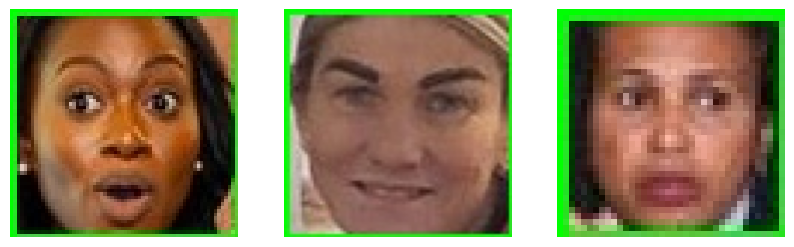

In [22]:
# Folder path containing the face-detected images
folder_path = '/content/face_detected'

# Get a list of file names in the folder
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Pick three random images and display them
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for ax, image_name in zip(axes, random.sample(file_names, 3)):
    image_path = os.path.join(folder_path, image_name)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib expects RGB
    ax.imshow(image)
    ax.axis('off')

plt.show()

In [23]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 13.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=c5d2ba13b39952c460653c4e4474164a02c924fd0f3a77348fb1a814508206e1
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


###3) Face attributes
There are not as many image files in face_detected as in the original image folder, and since they have all been cropped to detected faces, I choose to run all of the images though DeepFace's model. The face attribute analysis from DeepFace is not perfect, but still runs very well. In the github repository of deepface, it is also still called a demo (Serengil & Ozpinar, 2021). It is also relevant to note that deepface has been trained on images where the face has been cropped from the shoulders and up, whereas Haarcascade crops only the face. From deepface attribute analysis I am examining the gender of the people, their facial expressions (emotions) and their ethnicity (race), as all three elements are interesting to further examine to understand what these pictures from X entails. Especially since we know there are over 500 persons in the pictures, they play a key role within the 100 image sample. I loop through all of the images to detect all three attributes. If the model cannot detect the attributes, it runs an error message instead.

24-01-12 21:47:29 - Directory /root/.deepface created
24-01-12 21:47:29 - Directory /root/.deepface/weights created
24-01-12 21:47:30 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 14.1MB/s]


24-01-12 21:47:36 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:07<00:00, 67.2MB/s]


24-01-12 21:47:53 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:08<00:00, 62.3MB/s]


Error for face_GBAuk9OXsAAdpJC.jpeg : Face could not be detected in /content/face_detected/face_GBAuk9OXsAAdpJC.jpeg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]


Gender:  Woman
Emotion:  neutral
Ethnicity:  black


Action: race: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]


Gender:  Man
Emotion:  happy
Ethnicity:  asian


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]


Gender:  Man
Emotion:  neutral
Ethnicity:  black
Error for face_GA-oGHTWAAAbhZv.jpeg : Face could not be detected in /content/face_detected/face_GA-oGHTWAAAbhZv.jpeg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error for face_GA00ywQX0AAd4J5.jpeg : Face could not be detected in /content/face_detected/face_GA00ywQX0AAd4J5.jpeg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]


Gender:  Man
Emotion:  happy
Ethnicity:  black


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]


Gender:  Man
Emotion:  disgust
Ethnicity:  asian


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]


Gender:  Woman
Emotion:  fear
Ethnicity:  black
Error for face_GAGIApCWcAAHLyZ.jpeg : Face could not be detected in /content/face_detected/face_GAGIApCWcAAHLyZ.jpeg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error for face_GAwpg4gW8AAU6br.jpeg : Face could not be detected in /content/face_detected/face_GAwpg4gW8AAU6br.jpeg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Gender:  Man
Emotion:  happy
Ethnicity:  black
Error for face_GAFVS_KXAAAU-xw.jpeg : Face could not be detected in /content/face_detected/face_GAFVS_KXAAAU-xw.jpeg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]


Gender:  Man
Emotion:  neutral
Ethnicity:  asian


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]


Gender:  Man
Emotion:  neutral
Ethnicity:  black
Error for face_GA-z_j1WAAATM5l.jpeg : Face could not be detected in /content/face_detected/face_GA-z_j1WAAATM5l.jpeg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error for face_GACEvfGXkAAx7T2.jpeg : Face could not be detected in /content/face_detected/face_GACEvfGXkAAx7T2.jpeg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error for face_GAJk6CAaoAAHfX_.jpeg : Face could not be detected in /content/face_detected/face_GAJk6CAaoAAHfX_.jpeg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error for face_GApwrDmaEAArZ0R.jpeg : Face could not be detected in /content/face_detected/face_GApwrDmaEAArZ0R.jpeg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error for face_GAzxYKJXEAAhcXg.jpeg : Face could not be detected in /content/fa

Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]


Gender:  Man
Emotion:  sad
Ethnicity:  asian


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]


Gender:  Man
Emotion:  neutral
Ethnicity:  black


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]


Gender:  Man
Emotion:  neutral
Ethnicity:  asian
Error for face_GBA8iBMXUAAxSyc.jpeg : Face could not be detected in /content/face_detected/face_GBA8iBMXUAAxSyc.jpeg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]


Gender:  Man
Emotion:  happy
Ethnicity:  asian


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]


Gender:  Man
Emotion:  neutral
Ethnicity:  white


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]


Gender:  Man
Emotion:  sad
Ethnicity:  latino hispanic
Error for face_GA-ZVnBXsAAR9FR.jpeg : Face could not be detected in /content/face_detected/face_GA-ZVnBXsAAR9FR.jpeg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error for face_GA-oExKXQAAh784.jpeg : Face could not be detected in /content/face_detected/face_GA-oExKXQAAh784.jpeg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error for face_GBA-NMzWgAAI7E8.jpeg : Face could not be detected in /content/face_detected/face_GBA-NMzWgAAI7E8.jpeg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]


Gender:  Man
Emotion:  happy
Ethnicity:  white
Error for face_GAM2EW1a8AQTlh_.jpeg : Face could not be detected in /content/face_detected/face_GAM2EW1a8AQTlh_.jpeg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error for face_GA_txSgXwAE038q.jpeg : Face could not be detected in /content/face_detected/face_GA_txSgXwAE038q.jpeg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:02<00:00,  1.45it/s]


Gender:  Man
Emotion:  happy
Ethnicity:  asian


Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]


Gender:  Man
Emotion:  happy
Ethnicity:  black


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]


Gender:  Woman
Emotion:  surprise
Ethnicity:  black
Error for face_GA_Jv4sWwAAiuEi.jpeg : Face could not be detected in /content/face_detected/face_GA_Jv4sWwAAiuEi.jpeg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]


Gender:  Woman
Emotion:  happy
Ethnicity:  white


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]


Gender:  Man
Emotion:  happy
Ethnicity:  latino hispanic


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]


Gender:  Man
Emotion:  neutral
Ethnicity:  black


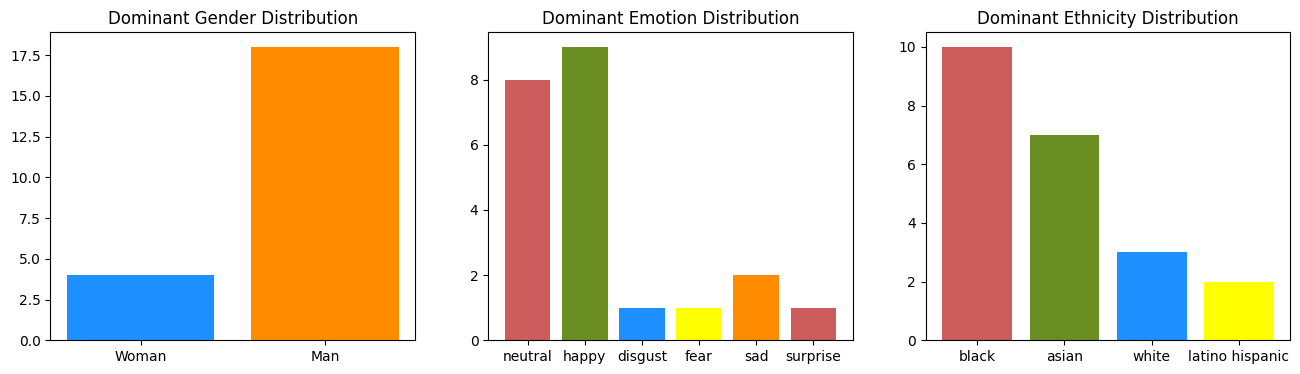

In [24]:
from deepface import DeepFace
# Partly code from ChatGPT, partly my own addition (the addition of the different analyses)

folder_path = "/content/face_detected"
# Get a list of file names in the folder
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Here I am creating empty lists to store dominant gender, emotion, and ethnicity for each image
dominant_genders = []
dominant_emotions = []
dominant_ethnicities = []

# Loop through each image and do the analysis
for file_name in file_names:
    try:
        # Full path to the image
        img_path = os.path.join(folder_path, file_name)

        # Analyze the image for emotion, gender and ethnicity
        analysis = DeepFace.analyze(img_path, actions=['emotion', 'gender','race'])

        # Access the dominant gender, emotion, and ethnicity for each image
        dominant_gender = analysis[0]['dominant_gender']
        dominant_emotion = analysis[0]['dominant_emotion']
        dominant_race = analysis[0]['dominant_race']
        print("Gender: ", dominant_gender)
        print("Emotion: ", dominant_emotion)
        print("Ethnicity: ", dominant_race)

        # Append the results to the lists
        dominant_genders.append(dominant_gender)
        dominant_emotions.append(dominant_emotion)
        dominant_ethnicities.append(dominant_race)

    except Exception as e:
        print("Error for", file_name, ":", e)

# Count the occurrences of each dominant gender, emotion and ethnicity
gender_counts = Counter(dominant_genders)
emotion_counts = Counter(dominant_emotions)
race_counts = Counter(dominant_ethnicities)

# Plot the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

# Plot for dominant gender
ax1.bar(gender_counts.keys(), gender_counts.values(), color=['dodgerblue', 'darkorange'])
ax1.set_title('Dominant Gender Distribution')

# Plot for dominant emotion
ax2.bar(emotion_counts.keys(), emotion_counts.values(), color=['indianred', 'olivedrab', 'dodgerblue', 'yellow', 'darkorange'])
ax2.set_title('Dominant Emotion Distribution')

# Plot for dominant ethnicity (race)
ax3.bar(race_counts.keys(), race_counts.values(), color=['indianred', 'olivedrab', 'dodgerblue','yellow','darkorange'])
ax3.set_title('Dominant Ethnicity Distribution')
plt.show()

# Results
The three barplots show interestingly enough that most of the persons in the detected faces are men, whereas one could expect that there would be more women than men in pictures related to ending gender-based violence, as women are often mentioned in this context. Multiple pictures in the dataset are also of women, but it can also be that deepface has incorrectly labeled some women as men. I opened a face detected image of a person coded as man, and they were in fact a woman. Further, the woman has dark skin, which might be a factor for deepface's ability to recognize people, if it has been trained on mostly pictures of people with lighter skintones. It might also be the contrast or darker and lighter colortones, that in itself affects the models ability to predict characteristics and of course image quality and crop. Further, the emotions are mostly happy and neutral, which is interesting in relation to the topic. Again, it can be a question of how well deepface reads their faces, as some of the faces were also in bad pixel quality, or not completely in portrait. When posting about 16 days of activism, I was expecting a mixed set of emotions, but not a overrepresentation of 'happy'. On the other hand, as a lot of the images are taken at events, people might be smiling at the camera when their pictures are taken. Latly, ethnicity is included as it might also show a tendency of where in the world the pictures are taken. Of course people of different ethnicities lives multiple places around the world, but at the same time, it is interesting that persons coded as 'white' are one of the lowest groups, which might indicate that e.g., people in Scandinavia are not posting so much with the hashtag #16DaysOfActivism.\
\
To recap other characteristics of the pictures related to #16DaysOfActivism posted on X in December 2023 are:\
1) The color orange is appearing in multiple posts and one of 12 other often appearing clusters of colors. Purple was also a frequent color.\
2) The picture of the demonstration showed that they were posting pictures of people holding signs saying fight gender-based violence, which is consistent with the meaning of the hashtag.\
3) Over 500 persons were found in the pictures, and shows that pictures of larger groups of people are possibly found when searching the hashtag on X. Further, a lot of chairs was also found during the object detection, which could be from events where people sit.


# Discussion
It could also have been interesting to look at semantic segmentation, where I could look into what is happening in all parts of the images. Further, I noticed that multiple images has a flag in them, but I was unable to find a model in Hugging Face that detects flags or detects the country related to the flag. If possible, it could be interesting to add this to the analysis, as this would better give an indication of where in the world events connected to 16 days of activism are happening and maybe also where the pictures are posted from. Even though this is a global event, it does not mean that the focus on the event is present globally.

# References

Krishna, R. (2017). Computer Vision: Foundations and Applications. Stanford University. \
\
Leung, X. Y., Bai, B., & Erdem, M. (2017). Hotel social media marketing: a study on message strategy and its effectiveness. Journal of Hospitality and Tourism Technology, 8(2), 239–255. https://doi-org.ludwig.lub.lu.se/10.1108/JHTT-02-2017-0012 \
\
Serengil, S. I., & Ozpinar, A. (2021). HyperExtended LightFace: A Facial Attribute Analysis Framework. In 2021 International Conference on Engineering and Emerging Technologies (ICEET) (pp. 1-4). IEEE. DOI: 10.1109/ICEET53442.2021.9659697 \
\
Singh, H. (2019). Chapter 2: Introduction to image processing. In: *Practical machine learning and image processing: for facial recognition, object detection, and pattern recognition using Python.* p. 7-27. Apress.\
\
Szeliski, R. (2022a). Deep Learning. In: Computer Vision. Texts in Computer Science. Springer, Cham. https://doi-org.ludwig.lub.lu.se/10.1007/978-3-030-34372-9_5 \
\
Szeliski, R. (2022b). Introduction. In: Computer Vision. Texts in Computer Science. Springer, Cham. https://doi-org.ludwig.lub.lu.se/10.1007/978-3-030-34372-9_1 \
\
Szeliski, R. (2022c). Recognition. In: Computer Vision. Texts in Computer Science. Springer, Cham. https://doi.org/10.1007/978-3-030-34372-9_6 \
\
UN Women (2023). *16 Days of Activism against Gender-Based Violence*. Accessed: 7/12/2023. https://www.unwomen.org/en/what-we-do/ending-violence-against-women/unite/16-days-of-activism \
\
WHO (2023). *16 days of activism against gender-based violence*. Accessed: 11/01/2024. https://www.who.int/campaigns/16-days-of-activism-against-gender-based-violence/2023

